In [1]:


import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)


model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)




2023-02-22 11:55:05.378361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 11:55:05.482074: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-22 11:55:05.484950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-22 11:55:05.484963: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2632 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1114 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0747 - accuracy: 0.9765


In [2]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)
print(val_loss,val_accuracy)

313/313 [==============================] - 0s 670us/step - loss: 0.0963 - accuracy: 0.9721
0.09627547115087509 0.972100019454956


<function matplotlib.pyplot.show(close=None, block=None)>

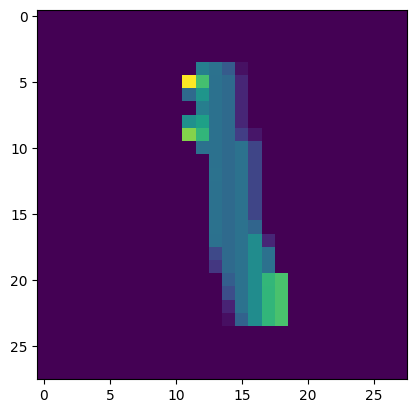

In [3]:

import matplotlib.pyplot as plt
plt.imshow(x_train[6])
plt.show
#print(x_train[0])

In [4]:
model.save('em_reader.model')
new_model=tf.keras.models.load_model('em_reader.model')
prediction=new_model.predict([x_test])
print(prediction)

INFO:tensorflow:Assets written to: em_reader.model/assets


INFO:tensorflow:Assets written to: em_reader.model/assets


313/313 [==============================] - 0s 612us/step
[[2.2621787e-09 3.8560326e-08 8.9844724e-07 ... 9.9995905e-01
  3.9588613e-08 2.0882123e-07]
 [1.9919113e-07 2.7316504e-05 9.9997228e-01 ... 8.8641290e-09
  5.3489129e-09 2.5789635e-13]
 [4.4004835e-08 9.9975824e-01 5.4604648e-06 ... 1.0372666e-04
  1.3689028e-05 6.2286495e-07]
 ...
 [1.1141497e-08 4.3169365e-07 1.1377486e-08 ... 9.9105309e-05
  1.0478619e-05 6.6780491e-04]
 [2.4815665e-05 1.1286098e-06 9.1624946e-07 ... 1.8657970e-06
  1.5030267e-04 4.9169699e-09]
 [1.3730744e-06 2.6739364e-09 4.2662202e-07 ... 8.4253238e-12
  4.2503192e-08 2.3123212e-09]]


In [5]:
import numpy as np
print(np.argmax(prediction[0]))

7
